In [1]:
# -*- coding: utf-8 -*-

Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [3]:
df = pd.read_csv('airbnb - Copy.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Create a copy of the dataframe and fill missing values with 'test' (for demonstration)

In [4]:
df_copy = df.copy()
df_fillna = df_copy.fillna('test')
df_fillna.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,test,test,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0


Distribution of Prices

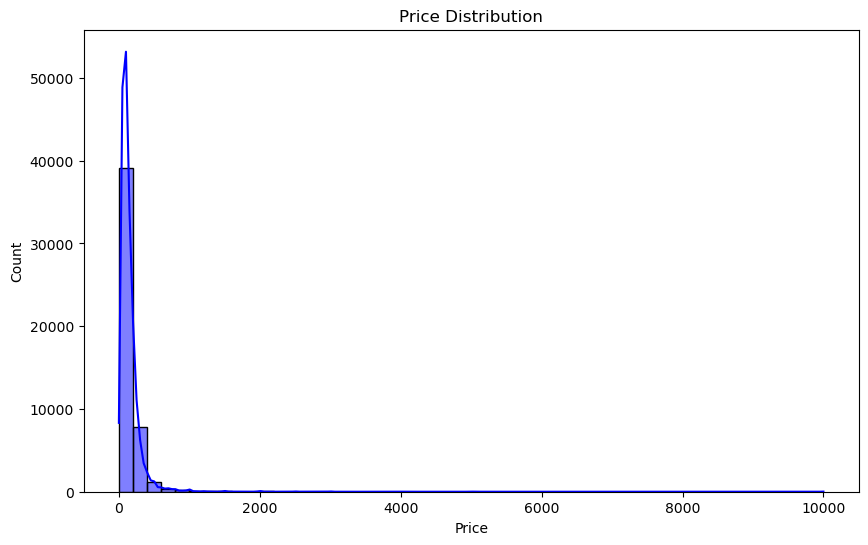

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Distribution of Room Types

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2608\360067334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='viridis')


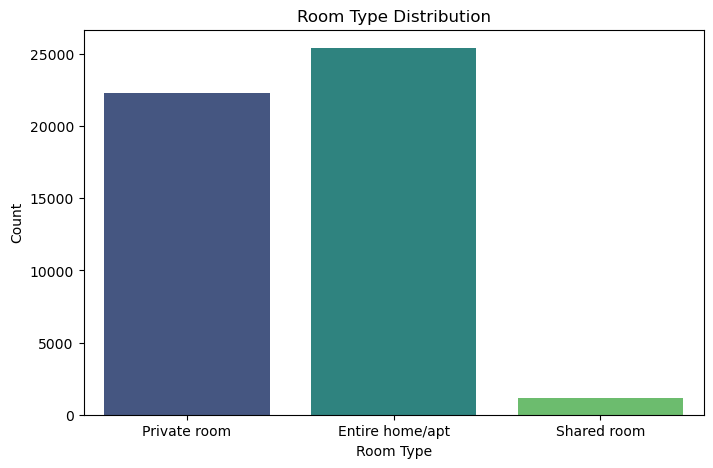

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', palette='viridis')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

Geographical Distribution of Listings

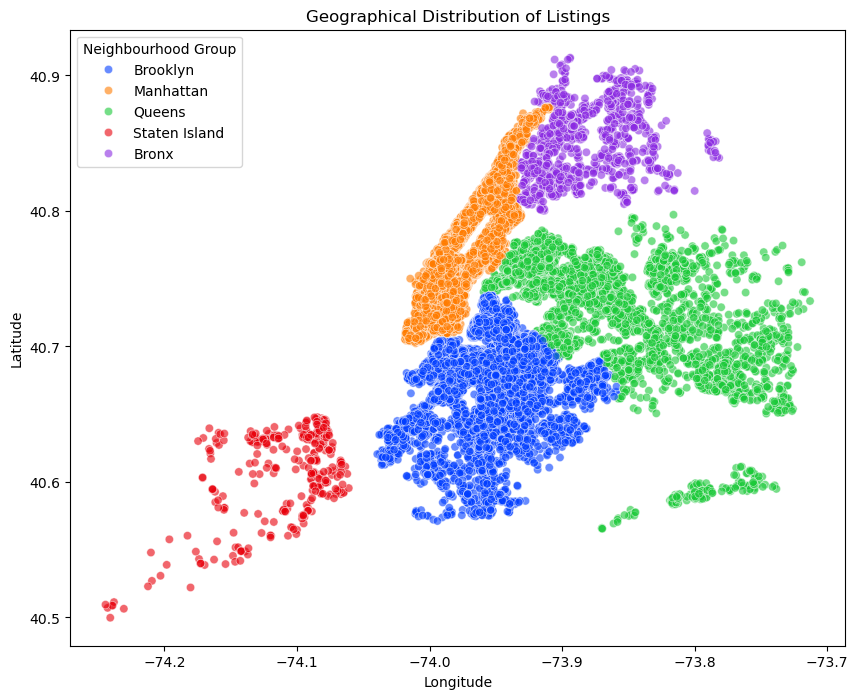

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='bright', alpha=0.6)
plt.title('Geographical Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.show()

Relationship Between Price and Number of Reviews

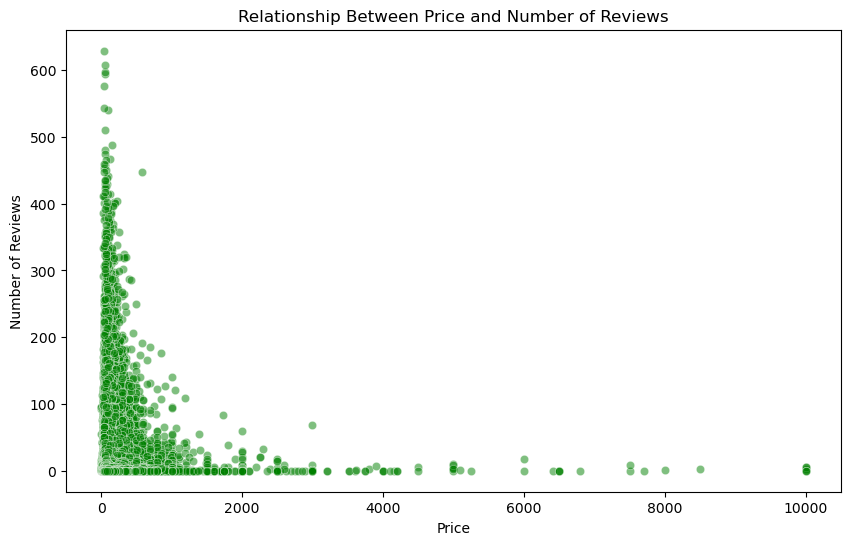

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='number_of_reviews', alpha=0.5, color='green')
plt.title('Relationship Between Price and Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

Top Hosts with Most Listings

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2608\23377910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='magma')


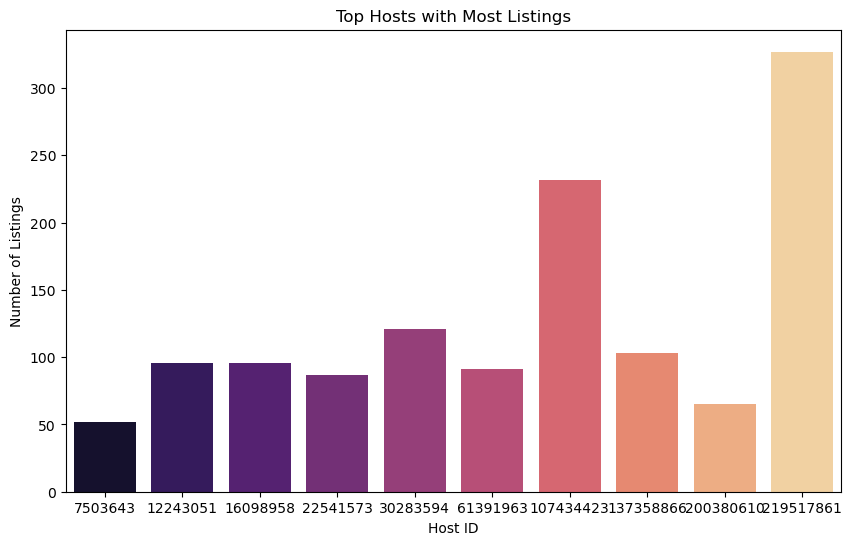

In [9]:
top_hosts = df['host_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='magma')
plt.title('Top Hosts with Most Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.show()

Distribution of Availability (365 Days)

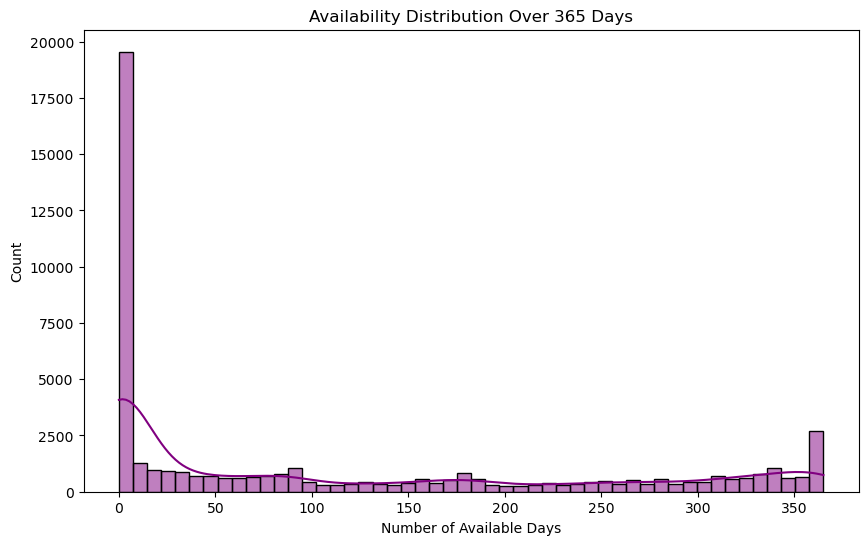

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=50, kde=True, color='purple')
plt.title('Availability Distribution Over 365 Days')
plt.xlabel('Number of Available Days')
plt.ylabel('Count')
plt.show()

Relationship Between Minimum Nights and Price

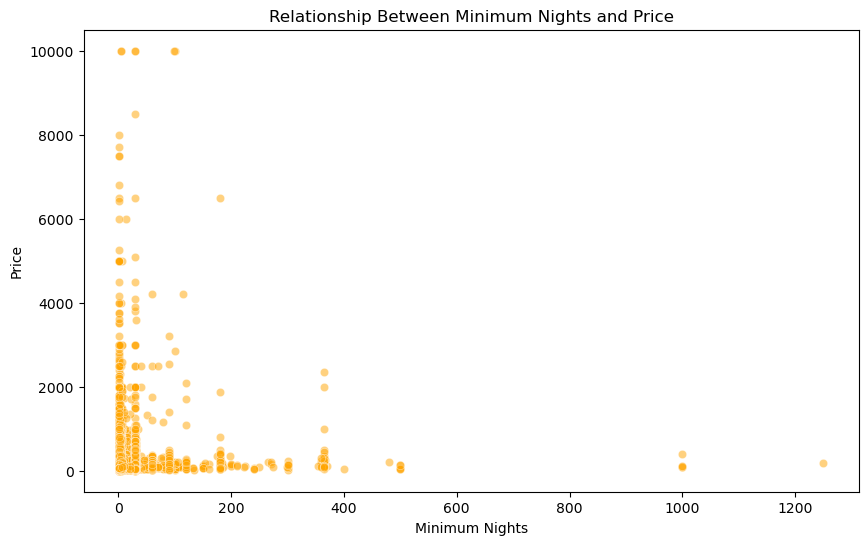

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.5, color='orange')
plt.title('Relationship Between Minimum Nights and Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

Convert 'last_review' column to datetime

In [12]:
df['last_review'] = pd.to_datetime(df['last_review'])

Number of Reviews Over Time

In [13]:
df.set_index('last_review', inplace=True)
monthly_reviews = df['number_of_reviews'].resample('M').sum()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2608\2801322421.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = df['number_of_reviews'].resample('M').sum()


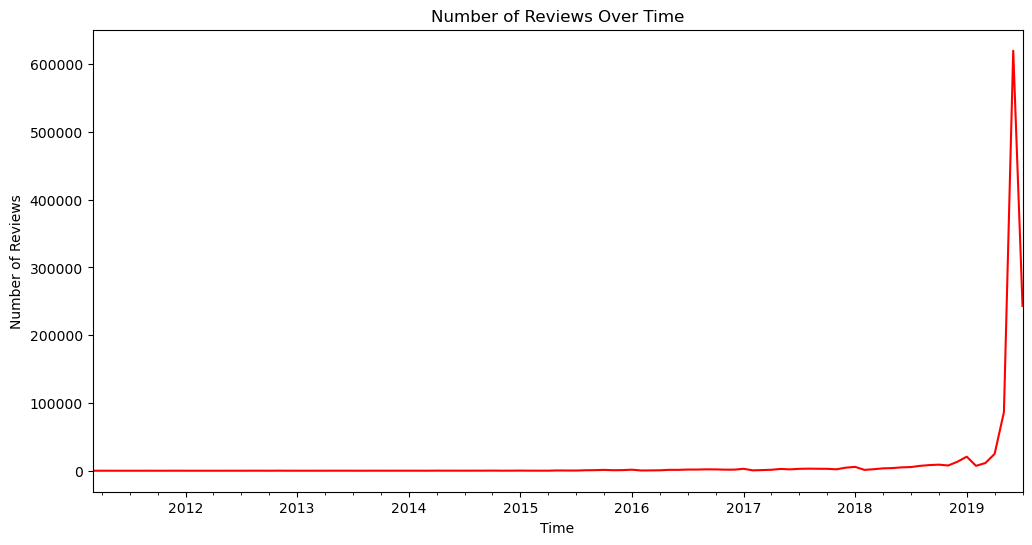

In [14]:
plt.figure(figsize=(12, 6))
monthly_reviews.plot(color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.show()

Correlation Matrix

In [15]:
corr_matrix = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()

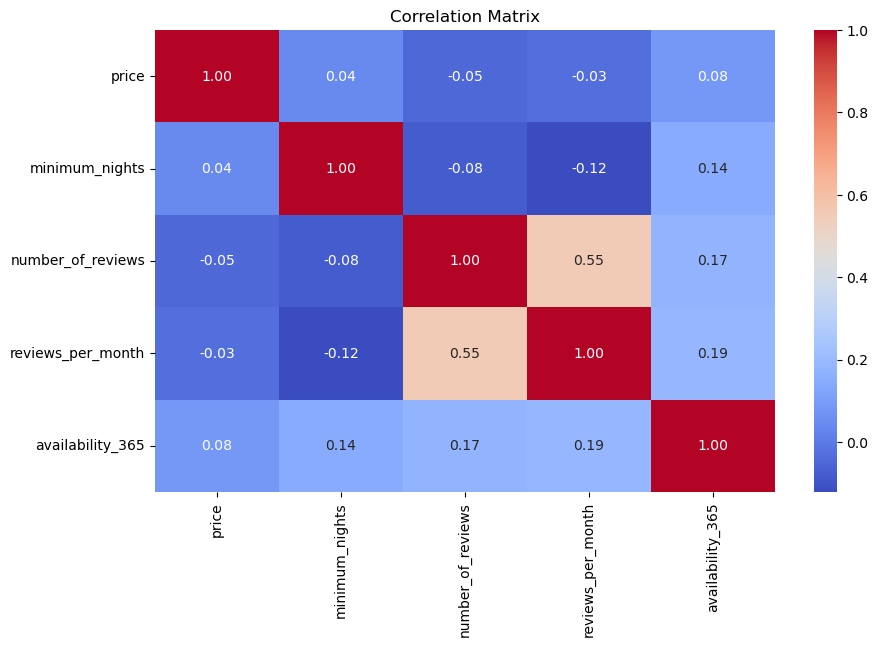

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Average Price by Neighbourhood Group

In [17]:
avg_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2608\3653231855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_neighbourhood.index, y=avg_price_by_neighbourhood.values, palette='rocket')


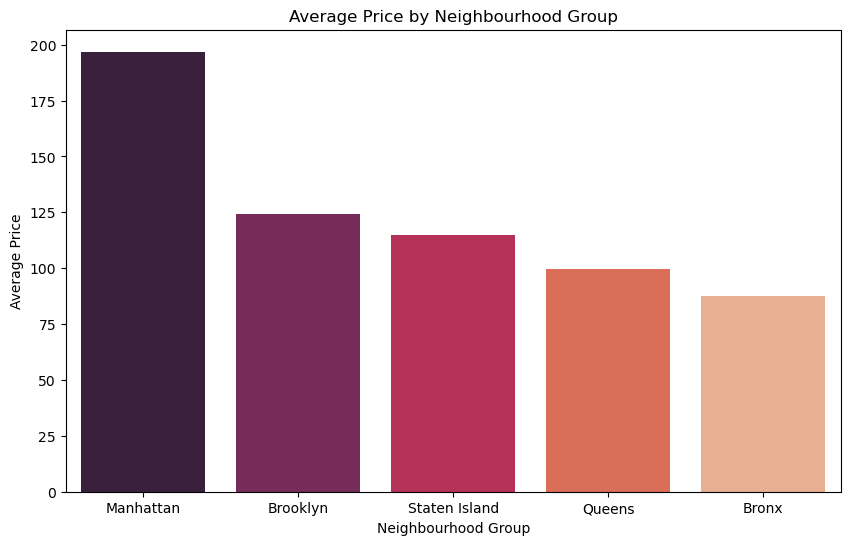

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_neighbourhood.index, y=avg_price_by_neighbourhood.values, palette='rocket')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

Check for Missing Values

In [19]:
print("Missing values in 'price':", df['price'].isna().sum())
print("Missing values in 'number_of_reviews':", df['number_of_reviews'].isna().sum())

Missing values in 'price': 0
Missing values in 'number_of_reviews': 0


Drop rows with missing values in 'price' and 'number_of_reviews'

In [20]:
df_cleaned = df.dropna(subset=['price', 'number_of_reviews'])

Check Data Types

In [21]:
print("Data type of 'price':", df_cleaned['price'].dtype)
print("Data type of 'number_of_reviews':", df_cleaned['number_of_reviews'].dtype)

Data type of 'price': int64
Data type of 'number_of_reviews': int64


Convert columns to numeric (if not already)

In [22]:
df_cleaned.loc[:, 'price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
df_cleaned.loc[:, 'number_of_reviews'] = pd.to_numeric(df_cleaned['number_of_reviews'], errors='coerce')

Drop rows with missing values after conversion

In [23]:
df_cleaned = df_cleaned.dropna(subset=['price', 'number_of_reviews'])

Check Variance of X

In [24]:
if np.var(df_cleaned['number_of_reviews']) == 0:
    print("Error: Variance of X is zero. All values of X are the same.")
else:
    print("Variance of X is valid.")

Variance of X is valid.


Prepare data for linear regression

In [25]:
X = df_cleaned['number_of_reviews'].values  # Independent variable (number of reviews)
Y = df_cleaned['price'].values              # Dependent variable (price)

Calculate mean of X and Y

In [26]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

Calculate slope (beta_1) and intercept (beta_0)

In [27]:
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X) ** 2)
beta_1 = numerator / denominator
beta_0 = mean_Y - beta_1 * mean_X

Predict price

In [28]:
Y_pred = beta_0 + beta_1 * X

Calculate Mean Squared Error (MSE)

In [29]:
mse = np.mean((Y - Y_pred) ** 2)

Display results

In [30]:
print(f"Regression Coefficients: Intercept (beta_0) = {beta_0:.2f}, Slope (beta_1) = {beta_1:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Regression Coefficients: Intercept (beta_0) = 158.74, Slope (beta_1) = -0.26
Mean Squared Error (MSE): 57540.22


Plot the regression line

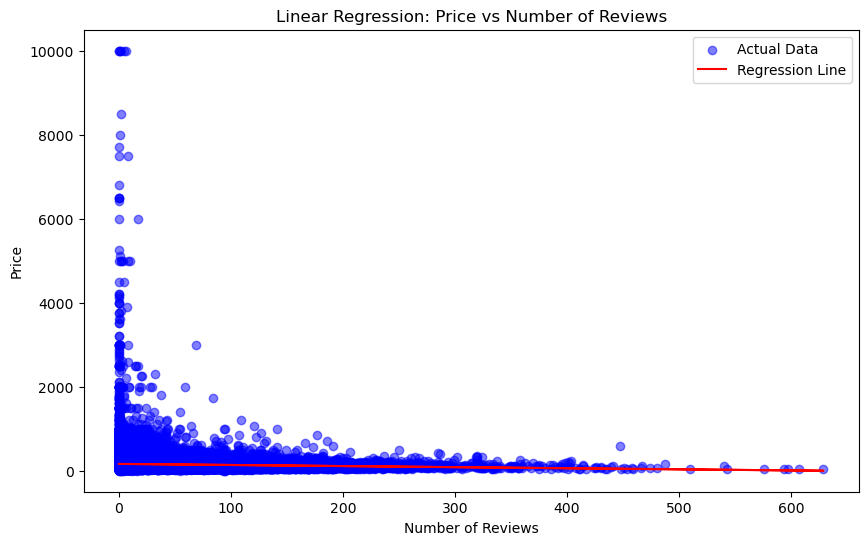

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data', alpha=0.5)
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.legend()
plt.show()